**Load Librareis**

In [1]:
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    from src.libs.project_libs import *
    pass

/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

In [2]:
from src.utils_cameramen_notebook.utils_graphics import utils_graphics as cameramen_ugraph
import PIL

**Load Input Cropped by its center Cameramen Image**

In [3]:
figures_list: list = []

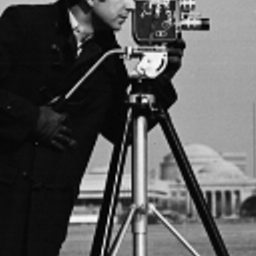

In [4]:
image_name="cameramen"
image_cameramen = dataset_loaders.load_image_by_name(image_name=f"{image_name}", cropped_center=256)
image_cameramen

**Load Target Datasets**

In [5]:
baseline_df = dataset_loaders.load_siren_baselines_dataset(dtype="dataframe")
pos = baseline_df["bpp"] <= 12.0
baseline_df = baseline_df[pos]

In [6]:
image_name = "cameramen"
jpeg_cameramen_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

In [7]:
image_name = "cameramen"
pruned_cameramen_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")
pruned_cameramen_df["image_name"] = ["cameramen"] * pruned_cameramen_df.shape[0]

In [8]:
quanted_cameramen_df = dataset_loaders.load_quant_dataset(dtype="dataframe")
quanted_cameramen_df["image_name"] = [f"{image_name}"] * quanted_cameramen_df.shape[0]

**Show Plots**

**Show Jpeg + Plain Siren**

In [9]:
def filter_required_data(item, n_hf=64, n_hl=5):
    return f"hf={str(n_hf)}" in item and f"hl={str(n_hl)}" in item
vals = baseline_df["cmprss-class"].values
pos = list(map(filter_required_data, vals))
a_baseline_row = baseline_df[pos].head(1)

a_baseline_row["prune_techs"] = ["BASELINE"] * a_baseline_row.shape[0]
a_baseline_row["prune_rate"] = ["-"] * a_baseline_row.shape[0]

a_baseline_row

# model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)
model_choices = pd.concat([a_baseline_row], axis = 0, ignore_index=True)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,prune_techs,prune_rate
84,1603774067-025589,-,84228.0,100.0,49.973107,10.281738,0.376953,0.000041,0.99574,Baseline:hf=64:hl=5,SIREN,SIREN,SIREN,BASELINE,-


In [10]:
pairs_oparams_up:list = [
    (25, 6),
    (32, 4),
]
pairs_oparams_base:list = [
    (55, 4),
    (45, 6),
]
pairs_oparams_op:list = [
    (45, 11),
    (55, 7),
]
pairs_hf_hl = pairs_oparams_up \
    + pairs_oparams_base \
    + pairs_oparams_op

picked_bsln_rows_df = []

In [11]:
def create_hf_hl_attrs(item):
    _, n_hf, n_hl = item.split(":")

    n_hf = int(n_hf.split("=")[1])
    n_hl = int(n_hl.split("=")[1])
    
    return (n_hf, n_hl)
pick_cols = ["cmprss-class"]
dest_cols = ["n_hf", "n_hl"]
vals = baseline_df["cmprss-class"].values
baseline_df[dest_cols] = list(map(create_hf_hl_attrs, vals))

def create_deepness_attr(item):
    _, _, n_hl = item.split(":")
    n_hl = int(n_hl.split("=")[1])
    if n_hl <= 5: return "low"
    elif n_hl > 9: return "high"
    return "mid"
vals = baseline_df["cmprss-class"].values
baseline_df["deepness"] = list(map(create_deepness_attr, vals))

def create_occurs_params_attr(item):
    bpp, psnr = item
    if psnr < 40: return "BL-U.P"
    elif bpp > 8: return "BL-O.P"
    return "BL-M."
pick_cols = ["bpp", "psnr"]
vals = baseline_df[pick_cols].values
baseline_df["occurs_params"] = list(map(create_occurs_params_attr, vals))

In [12]:
for ii, (n_hf, n_hl) in enumerate(pairs_hf_hl):
    pos = (baseline_df["n_hf"] == n_hf) & (baseline_df["n_hl"] == n_hl)

    picked_bsln_rows_df.append(baseline_df[pos].head(1))
    pass
picked_bsln_rows_df = pd.concat(picked_bsln_rows_df, axis=0, ignore_index=True)

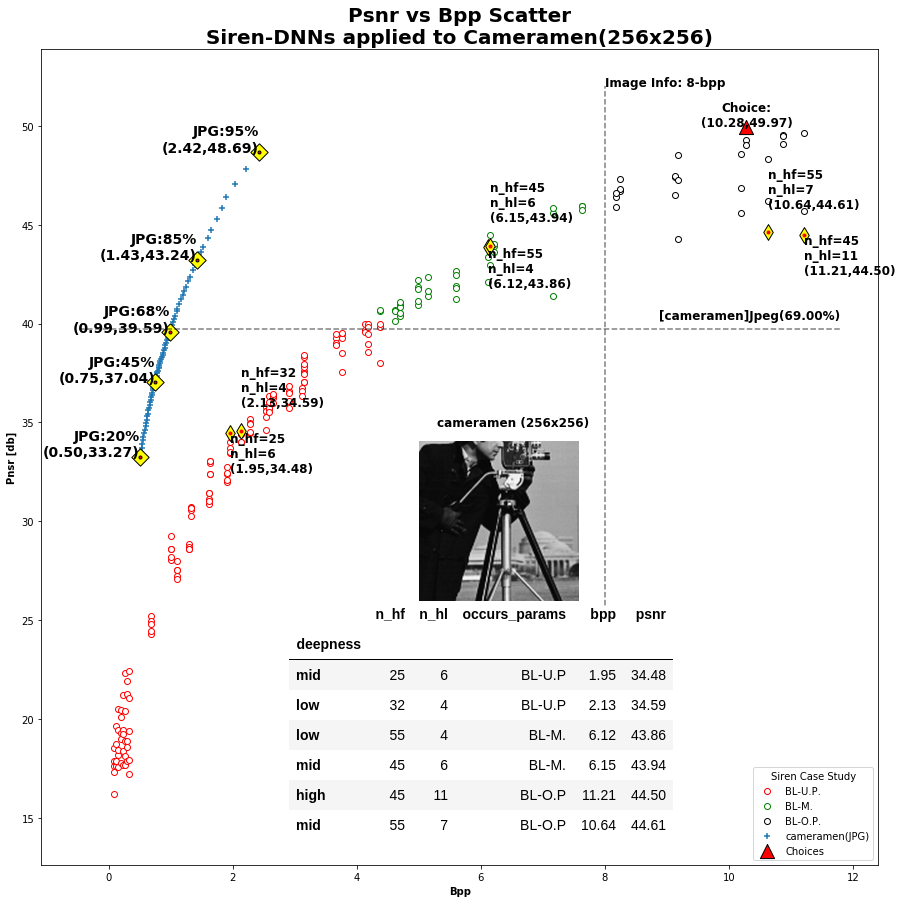

In [13]:
image_name = "cameramen"
data_shown = "jpeg_plain_siren"
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Image
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show DataFrames
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
images_list=jpeg_cameramen_df["image_name"].unique()

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass

cameramen_ugraph.show_baseline_fixed_points(
    a_df=baseline_df, ax=ax, pairs_hf_hl=pairs_hf_hl,
    horizontalalignment="left"
)
cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #
pick_cols = ["n_hf", "n_hl", "occurs_params", "bpp", "psnr"]
picked_bsln_rows_with_index = picked_bsln_rows_df.set_index(["deepness"])
# pick_cols = ["n_hf", "n_hl", "bpp", "psnr"]
# picked_bsln_rows_with_index = picked_bsln_rows_df.set_index(["deepness", "occurs_params"])
dfi.export(picked_bsln_rows_with_index.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Show Title
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")

plt.savefig(fig_name)
plt.show();

**Show Plots Jpeg + Plain Siren + Pruned Siren**

In [14]:
a_date = quanted_cameramen_df["init_from"].unique()[0]
pos = pruned_cameramen_df["date"] == a_date
a_pruned_row = pruned_cameramen_df[pos].head(1)
a_pruned_row["prune_techs"] = ["AGP"] * a_pruned_row.shape[0]
a_pruned_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,prune_techs
409,2020.12.13-232457,2020.11.29-231149,52036.0,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081,AGP:38,AGP,AGP,35-40,cameramen,AGP


In [15]:
def filter_required_data(item, n_hf=64, n_hl=5):
    return f"hf={str(n_hf)}" in item and f"hl={str(n_hl)}" in item
vals = baseline_df["cmprss-class"].values
pos = list(map(filter_required_data, vals))
a_baseline_row = baseline_df[pos].head(1)

a_baseline_row["prune_techs"] = ["BASELINE"] * a_baseline_row.shape[0]
a_baseline_row["prune_rate"] = ["-"] * a_baseline_row.shape[0]

a_baseline_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,n_hf,n_hl,deepness,occurs_params,prune_techs,prune_rate
84,1603774067-025589,-,84228.0,100.0,49.973107,10.281738,0.376953,0.000041,0.99574,Baseline:hf=64:hl=5,SIREN,SIREN,SIREN,64,5,low,BL-O.P,BASELINE,-


In [16]:
model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)

In [17]:
model_choices["prune_techs"] = "BL,AGP".split(",")
best_pruned_rows_df = model_choices

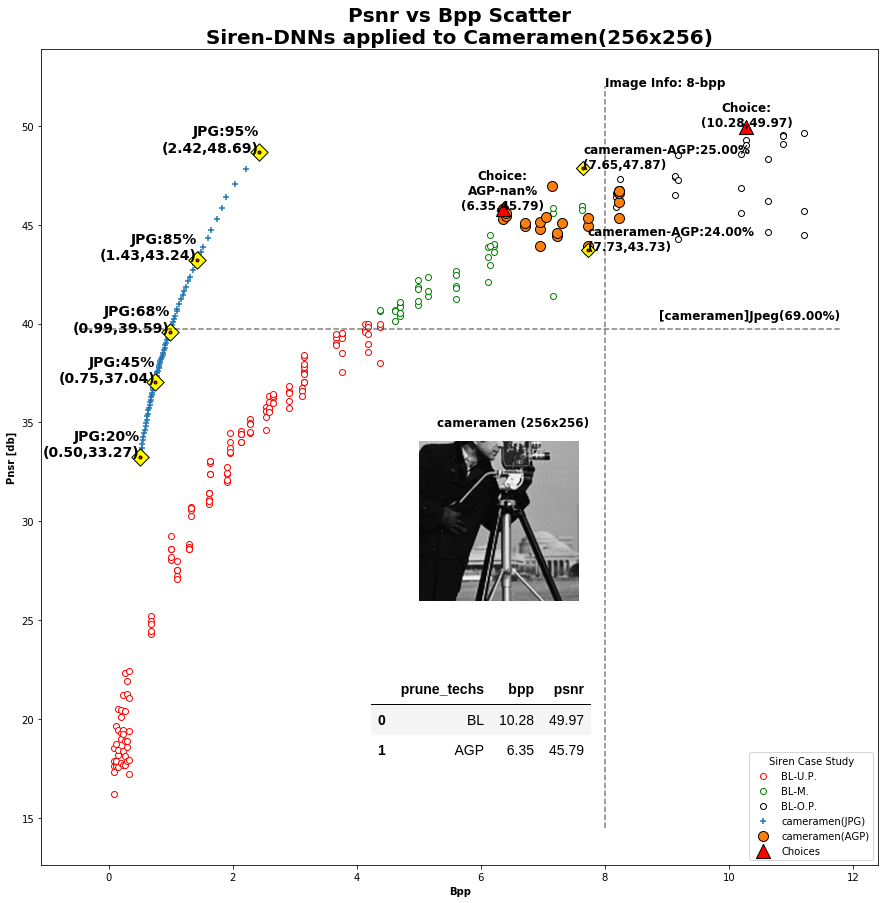

In [18]:
if "prune_rate" not in a_pruned_row:
    prune_rate = float(a_pruned_row["cmprss-class"].values[0].split(":")[1])
    a_pruned_row["prune_rate"] = prune_rate
    prune_techs = str(a_pruned_row["cmprss-class"].values[0].split(":")[0])
    a_pruned_row["prune_techs"] = prune_techs
    pass
image_name = "cameramen"
data_shown = f"jpeg_plain_pruned{prune_rate:.2f}_siren"

fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Image
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show Datasets
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

cameramen_ugraph.show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


image_name = "cameramen"
pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
cameramen_ugraph.add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")


cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #
pick_cols = ["prune_techs", "bpp", "psnr"]
dfi.export(best_pruned_rows_df.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Show Lines
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

# --------------------------------------------- #
# Tile, ...
# --------------------------------------------- #
ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
plt.savefig(f"./{image_name}_{data_shown}.png")
plt.show();

**Show Plots Jpeg + Plain Siren + Pruned Siren + Quanted Siren**

In [19]:
model_choices["quant_techs"] = "BL,AGP".split(",")
best_quanted_rows_df = [model_choices]
for gk, gdata in quanted_cameramen_df.groupby(by=["nbits"]):
    nbits = gk
    if nbits == 5: continue
    gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
    best_quanted_rows_df.append(gdata_sorted.head(1))
    pass
best_quanted_rows_df = pd.concat(best_quanted_rows_df, axis=0, ignore_index=True)

best_quanted_rows_df["nbits"] = best_quanted_rows_df['nbits'].fillna(32)

def adjust_quant_techs(item):
    res = list(filter(lambda char: char.upper() == char, item))
    res = ''.join(res)
    if res.startswith("QAT"):
        return res[0:5+1]
    return res
vals = best_quanted_rows_df["quant_techs"].values
best_quanted_rows_df["quant_techs"] = list(map(adjust_quant_techs, vals))
best_quanted_rows_df = best_quanted_rows_df.sort_values(by=["nbits"], ascending = False)

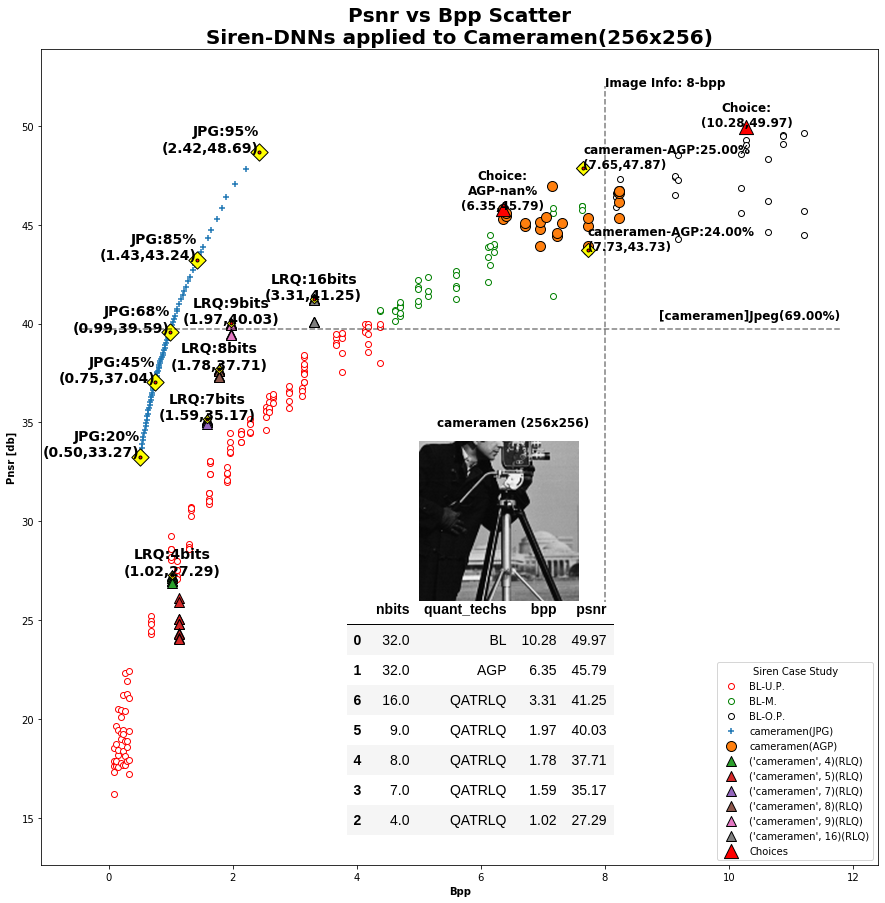

In [20]:
if "prune_rate" not in a_pruned_row:
    prune_rate = float(a_pruned_row["cmprss-class"].values[0].split(":")[1])
    a_pruned_row["prune_rate"] = prune_rate
    prune_techs = str(a_pruned_row["cmprss-class"].values[0].split(":")[0])
    a_pruned_row["prune_techs"] = prune_techs
    pass
image_name = "cameramen"
data_shown = f"jpeg_plain_pruned{prune_rate:.2f}_quanted_siren"
fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Image
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show Datasets
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

cameramen_ugraph.show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
cameramen_ugraph.show_quant_data_points(a_df=quanted_cameramen_df, ax=ax, gk=["image_name", "nbits"])

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


image_name = "cameramen"
quanted_cameramen_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quanted_cameramen_df.shape[0]
cameramen_ugraph.add_fixed_qat_points(a_df=quanted_cameramen_df, ax=ax, horizontalalignment="center")

pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
cameramen_ugraph.add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")

cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #
pick_cols = ["nbits", "quant_techs", "bpp", "psnr"]
dfi.export(best_quanted_rows_df.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Show Lines
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

# --------------------------------------------- #
# Tile, ...
# --------------------------------------------- #
ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
plt.savefig(fig_name)
plt.show();

### Create Quant Dataset
---

In [21]:
ROOT_DIR = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_1"
OUT_DIR = "./out/results"
CONF_FILEPATH = "./confs/cameramen/conf_cameramen_init_from_pruned.yaml"
TESTS_LOGGING_ROOTS = "./logs"
OUTPUT_DATASET_PATH = "./out/datasets"
PERFORMANCES_PATH = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/performances.txt"
OUT_FILENAME = "out.csv"

In [22]:
conf_data_dict = dict(
    root_dir=ROOT_DIR,
    out_dir=OUT_DIR,
    conf_filepath=CONF_FILEPATH,
    tests_logging_root=TESTS_LOGGING_ROOTS,
    output_dataset_path=OUTPUT_DATASET_PATH,
    performances_path=PERFORMANCES_PATH
)
# pprint(conf_data_dict)
meta_data_table = dict(
    tabular_data=conf_data_dict.items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)

In [23]:
ROOT_DIRS = [
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_1",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_2",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_3",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_4",
]

In [24]:
dfs_list: list = []
for ii, ROOT_DIR in enumerate(ROOT_DIRS):
    try:
        conf_data_dict = dict(
            root_dir=ROOT_DIR,
            out_dir=OUT_DIR,
            conf_filepath=CONF_FILEPATH,
            tests_logging_root=TESTS_LOGGING_ROOTS,
            output_dataset_path=OUTPUT_DATASET_PATH,
            performances_path=PERFORMANCES_PATH
        )
        parser = cpqd.get_custom_parser_for_notebook(conf_data_dict=conf_data_dict)
        args, _  = parser.parse_known_args()
        conf_data: dict = read_conf_file(conf_file_path=args.conf_filepath)
        a_df = cqd.create_out_dataset(args=args, conf_data=conf_data, out_filename=OUT_FILENAME)
        merged_df = merge_performace_w_models_data(args=args, models_df=a_df)
        dfs_list.append(copy.deepcopy(merged_df))
    except Exception as err:
        print("[*] Error occuring for:")
        print(f"\t{ii} - {ROOT_DIR}")
        print(f"\tError: {str(err)}")
        pass
    pass

In [25]:
quant_df = pd.concat(dfs_list, axis = 0, ignore_index=True)

In [26]:
a_date = quant_df["init_from"].unique()[0]
pos = pruned_cameramen_df["date"] == a_date
a_pruned_row = pruned_cameramen_df[pos].head(1)
a_pruned_row["prune_techs"] = ["AGP"] * a_pruned_row.shape[0]
a_pruned_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,image_name_2,prune_rate,prune_techs
420,2020.12.15-173411,2020.11.29-231149,62688.0,74.646344,47.87262,7.652344,0.506477,0.000065,0.992671,AGP:25,AGP,AGP,20-25,cameramen,cameramen-AGP,0.25,AGP


In [27]:
model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)

In [28]:
gk = ["image_name", "nbits"]
x_attr = "psnr"
best_quanted_dfs = []
for ii, (k, data) in enumerate(quant_df.groupby(by = gk)):
    data = data.sort_values(by=[x_attr], ascending=False)
    best_quanted_dfs.append(data.head(1))
    pass

pick_cols = ["nbits", "psnr", "bpp", "prune_techs"]
best_quanted_dfs = pd.concat(best_quanted_dfs, axis = 0, ignore_index = True)
best_quanted_dfs[pick_cols].head(5)
# best_quanted_dfs.columns

,nbits,psnr,bpp,prune_techs
0,4.0,25.525003,1.176575,AGP
1,8.0,38.478583,2.101685,AGP
2,9.0,40.916156,2.332962,AGP
3,16.0,42.341005,3.951904,AGP


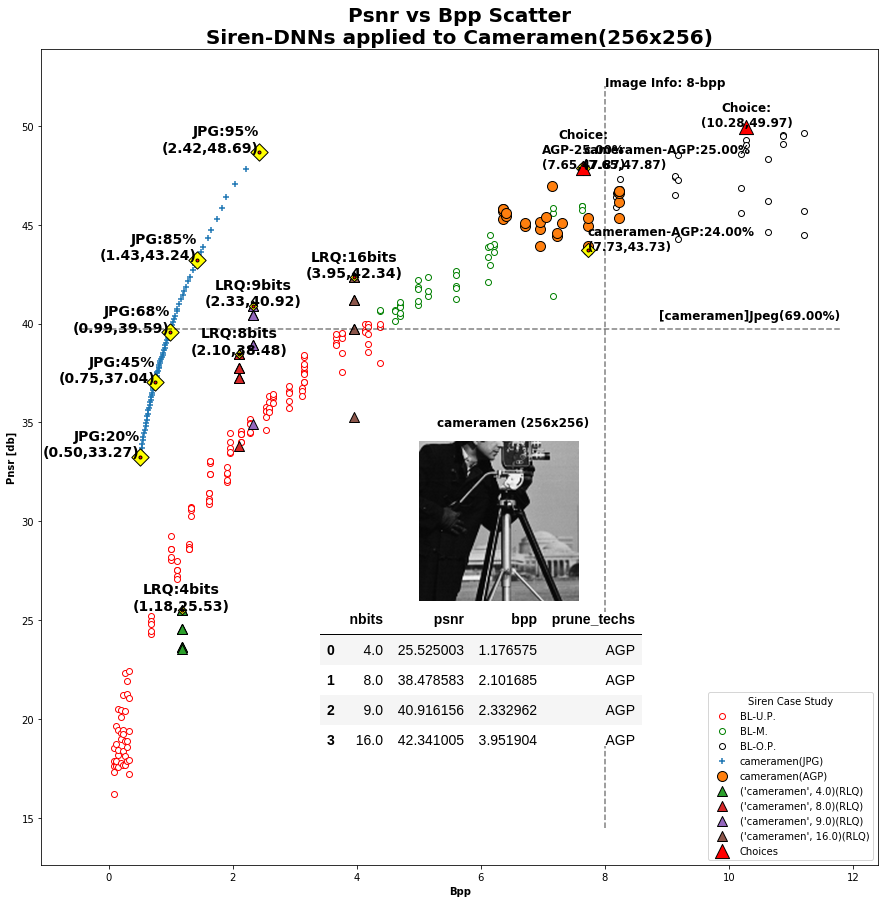

In [29]:
if "prune_rate" not in a_pruned_row:
    prune_rate = float(a_pruned_row["cmprss-class"].values[0].split(":")[1])
    a_pruned_row["prune_rate"] = prune_rate
    prune_techs = str(a_pruned_row["cmprss-class"].values[0].split(":")[0])
    a_pruned_row["prune_techs"] = prune_techs
    pass
image_name = "cameramen"
data_shown = f"jpeg_plain_pruned{prune_rate:.2f}_quanted_siren"
# fig_name = f"./{image_name}_{data_shown}.png"
# figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Image
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show Datasets
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

cameramen_ugraph.show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
cameramen_ugraph.show_quant_data_points(a_df=quant_df, ax=ax, gk=["image_name", "nbits"])

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


image_name = "cameramen"
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]
cameramen_ugraph.add_fixed_qat_points(a_df=quant_df, ax=ax, horizontalalignment="center")

pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
cameramen_ugraph.add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")

cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# --------------------------------------------- #
# Show Lines
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, horizontalalignment="left", s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

vals = best_quanted_dfs[pick_cols].values
headers = list(best_quanted_dfs[pick_cols].columns)
meta_table = dict(
    tabular_data=vals,
    headers=headers,
    floatfmt=".2f"
)
# a_table = tabulate.tabulate(**meta_table)
a_table = best_quanted_dfs[pick_cols]
# ax.text(y = 22, x = 2,  s=f"{a_table}", horizontalalignment="center", fontdict={'fontsize': 12, 'fontweight': 'bold'})

dfi.export(best_quanted_dfs[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 22)
        , frameon=False
    )
)

# --------------------------------------------- #
# Tile, ...
# --------------------------------------------- #
ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
# plt.savefig(fig_name)
plt.show();

In [30]:
headers = list(best_quanted_dfs[pick_cols].columns)
meta_table = dict(
    tabular_data=vals,
    headers=headers,
)
a_table = tabulate.tabulate(**meta_table)
print(a_table)

  nbits     psnr      bpp  prune_techs
-------  -------  -------  -------------
      4  25.525   1.17657  AGP
      8  38.4786  2.10168  AGP
      9  40.9162  2.33296  AGP
     16  42.341   3.9519   AGP


In [31]:
baseline_df.columns

Index(['date', 'init-from', 'size(byte)', 'footprint(%)', 'psnr', 'bpp', 'CR',
       'mse', 'ssim', 'cmprss-class', 'cmprss-class-2', 'cmprss-class-3',
       'prune_rate_intervals', 'n_hf', 'n_hl', 'deepness', 'occurs_params'],
      dtype='object')

In [32]:
baseline_df['cmprss-class'].unique()[0:2]

array(['Baseline:hf=55:hl=3', 'Baseline:hf=55:hl=4'], dtype=object)

In [33]:
def create_hf_hl_attrs(item):
    _, n_hf, n_hl = item.split(":")

    n_hf = int(n_hf.split("=")[1])
    n_hl = int(n_hl.split("=")[1])
    
    return (n_hf, n_hl)
pick_cols = ["cmprss-class"]
dest_cols = ["n_hf", "n_hl"]
vals = baseline_df["cmprss-class"].values
baseline_df[dest_cols] = list(map(create_hf_hl_attrs, vals))

In [34]:
def create_deepness_attr(item):
    _, _, n_hl = item.split(":")
    n_hl = int(n_hl.split("=")[1])
    if n_hl <= 5: return "low"
    elif n_hl > 9: return "high"
    return "mid"
vals = baseline_df["cmprss-class"].values
baseline_df["deepness"] = list(map(create_deepness_attr, vals))
vals = baseline_df["cmprss-class"].values
baseline_df["deepness"] = list(map(create_deepness_attr, vals))

In [35]:
fig = px.scatter(baseline_df, x="bpp", y="psnr",
    color="deepness",
    hover_data=list(baseline_df.columns)
)
fig.show();

In [36]:
def create_occurs_params_attr(item):
    bpp, psnr = item
    if psnr < 40: return "BL-U.P"
    elif bpp > 8: return "BL-O.P"
    return "BL-M."
pick_cols = ["bpp", "psnr"]
vals = baseline_df[pick_cols].values
baseline_df["occurs_params"] = list(map(create_occurs_params_attr, vals))

In [37]:
fig = px.scatter(baseline_df, x="bpp", y="psnr",
    color="occurs_params",
    hover_data=list(baseline_df.columns)
)
fig.show();

In [38]:
pairs_oparams_up:list = [
    (25, 6),
    (32, 4),
]
pairs_oparams_base:list = [
    (55, 4),
    (45, 6),
]
pairs_oparams_op:list = [
    (45, 11),
    (55, 7),
]
pairs_hf_hl = pairs_oparams_up \
    + pairs_oparams_base \
    + pairs_oparams_op

In [39]:
picked_bsln_rows_df = []
for ii, (n_hf, n_hl) in enumerate(pairs_hf_hl):
    pos = (baseline_df["n_hf"] == n_hf) & (baseline_df["n_hl"] == n_hl)

    picked_bsln_rows_df.append(baseline_df[pos].head(1))
    pass
picked_bsln_rows_df = pd.concat(picked_bsln_rows_df, axis=0, ignore_index=True)

In [40]:
model_choices = pd.concat([a_baseline_row], axis = 0, ignore_index=True)

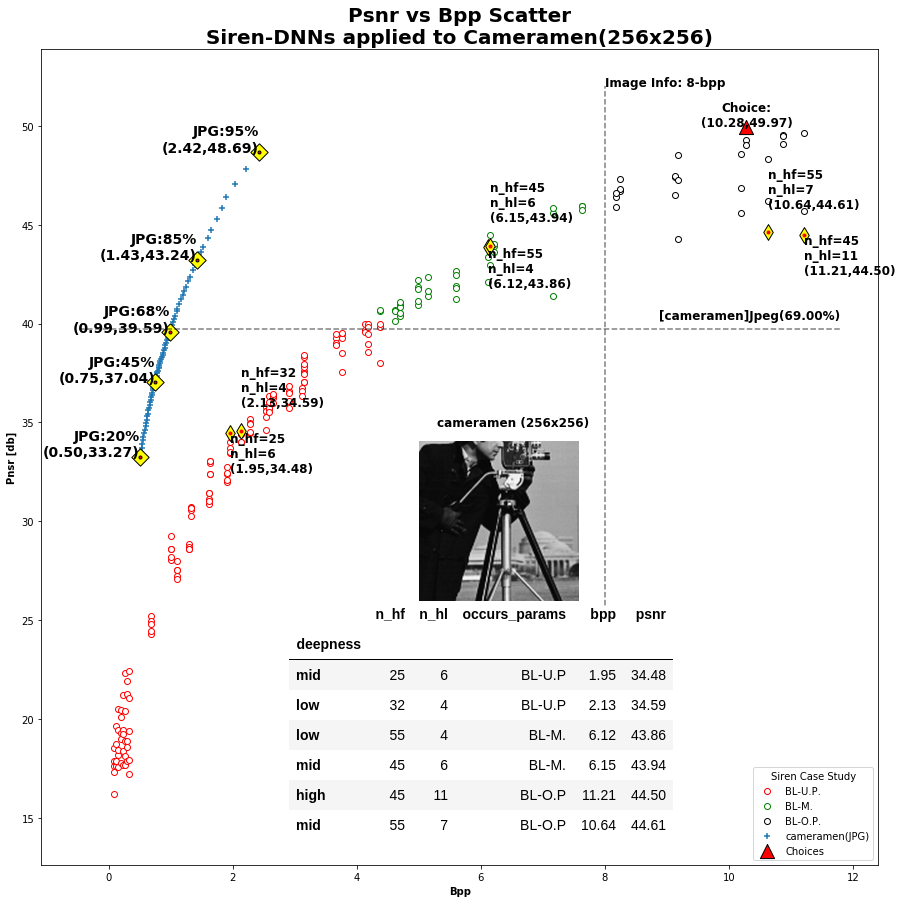

In [41]:
image_name = "cameramen"
data_shown = "jpeg_plain_siren_2"
fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Image
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show Data Frames
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
images_list=jpeg_cameramen_df["image_name"].unique()

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)
cameramen_ugraph.show_baseline_fixed_points(
    a_df=baseline_df, ax=ax, pairs_hf_hl=pairs_hf_hl,
    horizontalalignment="left"
)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #

pick_cols = ["n_hf", "n_hl", "occurs_params", "bpp", "psnr"]
picked_bsln_rows_with_index = picked_bsln_rows_df.set_index(["deepness"])
# pick_cols = ["n_hf", "n_hl", "bpp", "psnr"]
# picked_bsln_rows_with_index = picked_bsln_rows_df.set_index(["deepness", "occurs_params"])
dfi.export(picked_bsln_rows_with_index.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Tile, ...
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
plt.savefig(fig_name)
plt.show();

In [42]:
picked_bsln_rows_df.set_index("deepness")

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,n_hf,n_hl,occurs_params
deepness,,,,,,,,,,,,,,,,
mid,1604282134-409324,-,16004.0,100.0,34.476150,1.953613,1.983879,0.001445,0.927119,Baseline:hf=25:hl=6,SIREN,SIREN,SIREN,25,6,BL-U.P
low,1604594787-201566,-,17412.0,100.0,34.592324,2.125488,1.823455,0.001390,0.925840,Baseline:hf=32:hl=4,SIREN,SIREN,SIREN,32,4,BL-U.P
low,1603583765-067812,-,50164.0,100.0,43.862267,6.123535,0.632924,0.000164,0.987518,Baseline:hf=55:hl=4,SIREN,SIREN,SIREN,55,4,BL-M.
mid,1603867216-755376,-,50404.0,100.0,43.938105,6.152832,0.629910,0.000161,0.986268,Baseline:hf=45:hl=6,SIREN,SIREN,SIREN,45,6,BL-M.
high,1603843559-156915,-,91804.0,100.0,44.498954,11.206543,0.345845,0.000150,0.992845,Baseline:hf=45:hl=11,SIREN,SIREN,SIREN,45,11,BL-O.P
mid,1603583765-067812,-,87124.0,100.0,44.613240,10.635254,0.364423,0.000161,0.993762,Baseline:hf=55:hl=7,SIREN,SIREN,SIREN,55,7,BL-O.P


In [43]:
a_date = quant_df["init_from"].unique()[0]
pos = pruned_cameramen_df["date"] == a_date
a_pruned_row = pruned_cameramen_df[pos].head(1)
a_pruned_row["prune_techs"] = ["AGP"] * a_pruned_row.shape[0]
a_pruned_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,image_name_2,prune_rate,prune_techs
420,2020.12.15-173411,2020.11.29-231149,62688.0,74.646344,47.87262,7.652344,0.506477,0.000065,0.992671,AGP:25,AGP,AGP,20-25,cameramen,cameramen-AGP,0.25,AGP


In [44]:
model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)

In [45]:
model_choices["prune_techs"] = "BL,AGP".split(",")
best_pruned_rows_df = model_choices

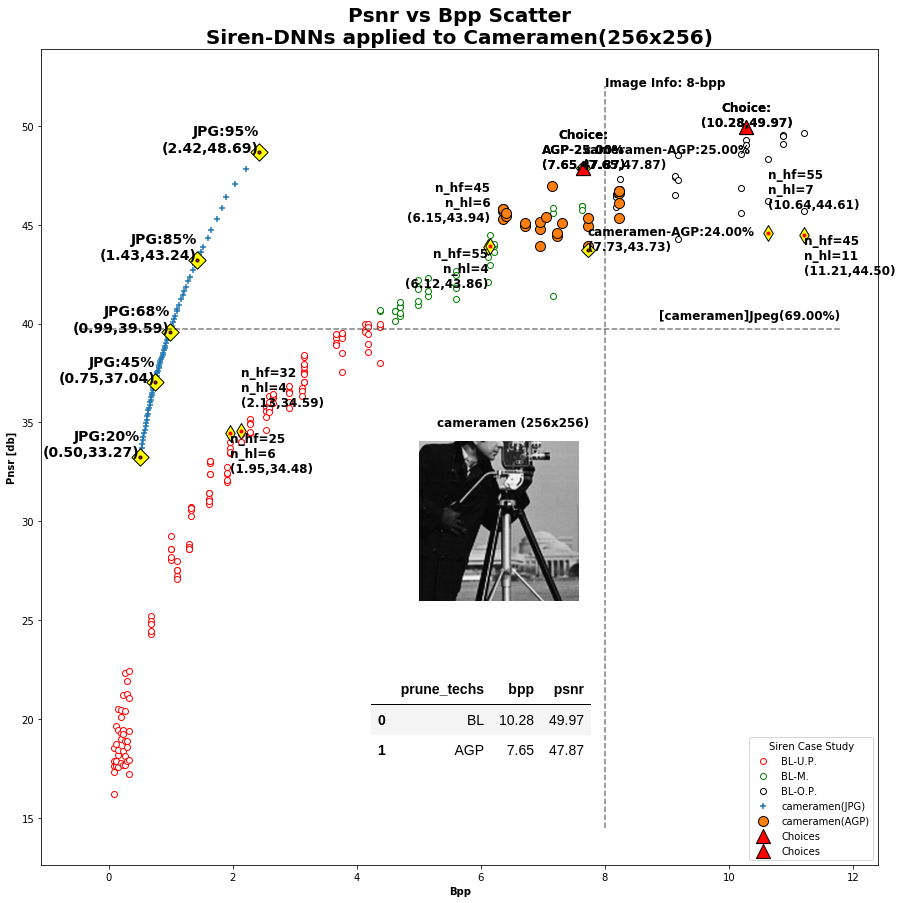

In [46]:
if "prune_rate" not in a_pruned_row:
    prune_rate = float(a_pruned_row["cmprss-class"].values[0].split(":")[1])
    a_pruned_row["prune_rate"] = prune_rate
    prune_techs = str(a_pruned_row["cmprss-class"].values[0].split(":")[0])
    a_pruned_row["prune_techs"] = prune_techs
    pass
else:
    prune_rate = a_pruned_row["prune_rate"].values[0]
    pass
image_name = "cameramen"
data_shown = f"jpeg_plain_pruned{prune_rate:.2f}_siren"
fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Imaage
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show DataFrames
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

cameramen_ugraph.show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
# cameramen_ugraph.show_quant_data_points(a_df=quant_df, ax=ax, gk=["image_name", "nbits"])

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
image_name = "cameramen"
# quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]
# cameramen_ugraph.add_fixed_qat_points(a_df=quant_df, ax=ax, horizontalalignment="center")

pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
cameramen_ugraph.add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")

cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# show_models_choices(a_df=model_choices, ax=ax)
images_list=jpeg_cameramen_df["image_name"].unique()

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)
cameramen_ugraph.show_baseline_fixed_points(
    a_df=baseline_df, ax=ax, pairs_hf_hl=pairs_hf_hl,
    horizontalalignment="right",
    pos_alignment = "left,left,right,right,left,left".split(",")
)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #
# pick_cols = ["n_hf", "n_hl", "occurs_params", "bpp", "psnr"]
# picked_bsln_rows_with_index = picked_bsln_rows_df.set_index("deepness")
# dfi.export(picked_bsln_rows_with_index.round(2)[pick_cols], "mytable.png")
pick_cols = ["prune_techs", "bpp", "psnr"]
dfi.export(best_pruned_rows_df.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Show Title
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
plt.savefig("./cameramen_jpg_plain_pruned25_siren.png")
# plt.savefig(f"./{image_name}_{data_shown}.png")
plt.savefig(fig_name)
plt.show();

In [47]:
model_choices["quant_techs"] = "BL,AGP".split(",")
best_quanted_rows_df = [model_choices]
for gk, gdata in quant_df.groupby(by=["quant_techs_2", "nbits"]):
    tech, nbits = gk
    if nbits == 5: continue
    gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
    best_quanted_rows_df.append(gdata_sorted.head(1))
    pass
best_quanted_rows_df = pd.concat(best_quanted_rows_df, axis=0, ignore_index=True)

best_quanted_rows_df["nbits"] = best_quanted_rows_df['nbits'].fillna('32')

def adjust_quant_techs(item):
    res = list(filter(lambda char: char.upper() == char, item))
    return ''.join(res)
vals = best_quanted_rows_df["quant_techs"].values
best_quanted_rows_df["quant_techs"] = list(map(adjust_quant_techs, vals))

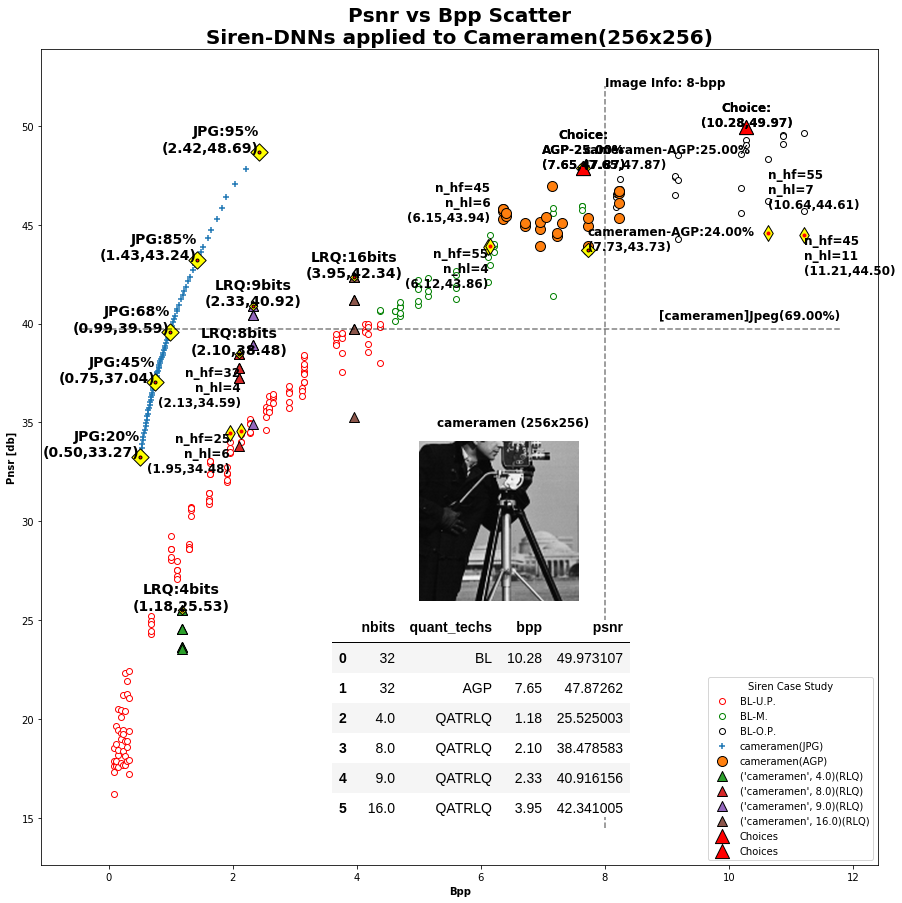

In [48]:
if "prune_rate" not in a_pruned_row:
    prune_rate = float(a_pruned_row["cmprss-class"].values[0].split(":")[1])
    a_pruned_row["prune_rate"] = prune_rate
    prune_techs = str(a_pruned_row["cmprss-class"].values[0].split(":")[0])
    a_pruned_row["prune_techs"] = prune_techs
else:
    prune_rate = a_pruned_row["prune_rate"].values[0]
    pass
image_name = "cameramen"
data_shown = f"jpeg_plain_pruned{prune_rate:.2f}_quanted_siren"
fig_name = f"./{image_name}_{data_shown}.png"
figures_list.append(fig_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

# --------------------------------------------- #
# Show Imaage
# --------------------------------------------- #
cameramen_ugraph.show_images_within_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

# --------------------------------------------- #
# Show DataFrames
# --------------------------------------------- #
cameramen_ugraph.show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
cameramen_ugraph.show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")

cameramen_ugraph.show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
cameramen_ugraph.show_quant_data_points(a_df=quant_df, ax=ax, gk=["image_name", "nbits"])

# --------------------------------------------- #
# Show Fixed Data Points
# --------------------------------------------- #
image_name = "cameramen"
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]
cameramen_ugraph.add_fixed_qat_points(a_df=quant_df, ax=ax, horizontalalignment="center")

pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
cameramen_ugraph.add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")

cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)

# show_models_choices(a_df=model_choices, ax=ax)
images_list=jpeg_cameramen_df["image_name"].unique()

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    cameramen_ugraph.add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


cameramen_ugraph.show_models_choices(a_df=model_choices, ax=ax)
cameramen_ugraph.show_baseline_fixed_points(
    a_df=baseline_df, ax=ax, pairs_hf_hl=pairs_hf_hl,
    horizontalalignment="left",
    pos_alignment = "right,right,right,right,left,left".split(",")
)

# --------------------------------------------- #
# Show Table
# --------------------------------------------- #
pick_cols = ["nbits", "quant_techs", "bpp", "psnr"]
dfi.export(best_quanted_rows_df.round(2)[pick_cols], "mytable.png")
mytable = Image.open("mytable.png")
ax.add_artist(
    AnnotationBbox(
        OffsetImage(mytable, cmap='gray',)
        , (6, 20)
        , frameon=False
    )
)

# --------------------------------------------- #
# Show Title
# --------------------------------------------- #
ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right")
plt.savefig("./cameramen_jpg_plain_pruned25_quanted_siren.png")
# plt.savefig(f"./{image_name}_{data_shown}.png")
plt.savefig(fig_name)
plt.show();

In [49]:
figures_list

['./cameramen_jpeg_plain_siren.png',
 './cameramen_jpeg_plain_pruned38.00_siren.png',
 './cameramen_jpeg_plain_pruned38.00_quanted_siren.png',
 './cameramen_jpeg_plain_siren_2.png',
 './cameramen_jpeg_plain_pruned0.25_siren.png',
 './cameramen_jpeg_plain_pruned0.25_quanted_siren.png']

In [50]:

import PyPDF2
import img2pdf
import fitz
def save_all_images_as_merged_pdf(figures_list: list, out_dir:str='.', out_merged_file:str="merged.pdf"):
    """TODO Comment it."""
    pdf_filename =  os.path.join(
        out_dir, f"{out_merged_file}")
    
    doc = fitz.open()                            # PDF with the pictures
    for i, f in enumerate(figures_list):
        img = fitz.open(f) # open pic as document
        rect = img[0].rect                       # pic dimension
        pdfbytes = img.convertToPDF()            # make a PDF stream
        img.close()                              # no longer needed
        imgPDF = fitz.open("pdf", pdfbytes)      # open stream as PDF
        page = doc.newPage(width = rect.width,   # new page with ...
                           height = rect.height) # pic dimension
        page.showPDFpage(rect, imgPDF, 0) 
               # image fills the page
    doc.save(pdf_filename)
    pass

In [51]:
image_name="cameramen"
out_merged_file=f"{image_name}_siren.pdf"
save_all_images_as_merged_pdf(figures_list=figures_list, out_merged_file=f"{out_merged_file}")